In [34]:
import pandas as pd

In [105]:
df = pd.read_csv("Hotel-A-train.csv")
df[["Expected_checkin","Expected_checkout","Booking_date"]] = df[["Expected_checkin","Expected_checkout","Booking_date"]].apply(pd.to_datetime)


In [111]:
train = df.drop(["Reservation-id","Reservation_Status"],axis = 1)
df1 = df.drop(["Reservation-id"],axis = 1)

In [113]:
df1.dtypes

Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                            object
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date              datetime64[ns]
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                          int64
dtype: object

In [115]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20


quantitative = [f for f in df1.columns if df1.dtypes[f] != 'object']
#quantitative.remove('Reservation-id')
qualitative = [f for f in df1.columns if df1.dtypes[f] == 'object']
#qualitative.remove('Reservation_Status')

In [116]:
qualitative

['Gender',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Reservation_Status',
 'Use_Promotion']

In [117]:
quantitative

['Age',
 'Expected_checkin',
 'Expected_checkout',
 'Booking_date',
 'Adults',
 'Children',
 'Babies',
 'Discount_Rate',
 'Room_Rate']

In [118]:
li_qual = list(qualitative)

In [119]:
li_quan = list(quantitative)

In [120]:
missing = train.isnull().sum()

In [121]:
missing

Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [122]:
for column in train:
    print(column,train[str(column)].unique())

Gender ['F' 'M']
Age [40 49 42 25 62 34 53 59 21 69 52 55 22 32 45 33 43 38 18 66 44 29 54 48
 23 35 36 51 68 28 67 63 60 26 24 56 61 65 46 64 58 31 37 47 39 57 30 19
 41 20 27 70 50]
Ethnicity ['Latino' 'caucasian' 'African American' 'Asian American']
Educational_Level ['Grad' 'Mid-School' 'College' 'High-School']
Income ['<25K' '50K -- 100K' '>100K' '25K --50K']
Country_region ['North' 'East' 'South' 'West']
Hotel_Type ['City Hotel' 'Airport Hotels' 'Resort']
Expected_checkin ['2015-07-01T00:00:00.000000000' '2015-07-02T00:00:00.000000000'
 '2015-07-03T00:00:00.000000000' '2015-05-06T00:00:00.000000000'
 '2015-04-22T00:00:00.000000000' '2015-06-23T00:00:00.000000000'
 '2015-07-05T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-07-07T00:00:00.000000000' '2015-07-08T00:00:00.000000000'
 '2015-05-11T00:00:00.000000000' '2015-07-15T00:00:00.000000000'
 '2015-07-16T00:00:00.000000000' '2015-05-29T00:00:00.000000000'
 '2015-05-19T00:00:00.000000000' '2015-06-19T00:00:00.00000000

In [124]:
for c in qualitative:
    train[c] = df1[c].astype('category')

In [125]:
df1.dtypes

Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                            object
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date              datetime64[ns]
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                          int64
dtype: object

In [126]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,27499.0,43.977454,15.303148,18.0,31.0,44.0,57.0,70.0
Adults,27499.0,2.333576,1.176526,1.0,2.0,2.0,3.0,5.0
Children,27499.0,1.743882,0.721972,1.0,1.0,2.0,2.0,3.0
Babies,27499.0,0.351540,0.573326,0.0,0.0,0.0,1.0,2.0
Discount_Rate,27499.0,12.495182,11.206036,0.0,5.0,10.0,20.0,40.0
Room_Rate,27499.0,175.136478,43.877087,100.0,137.0,175.0,214.0,250.0


In [158]:
from sklearn.preprocessing import LabelEncoder
df_le = df1.copy()
le = LabelEncoder()

categoricals = ['Gender',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Reservation_Status',
 'Use_Promotion']



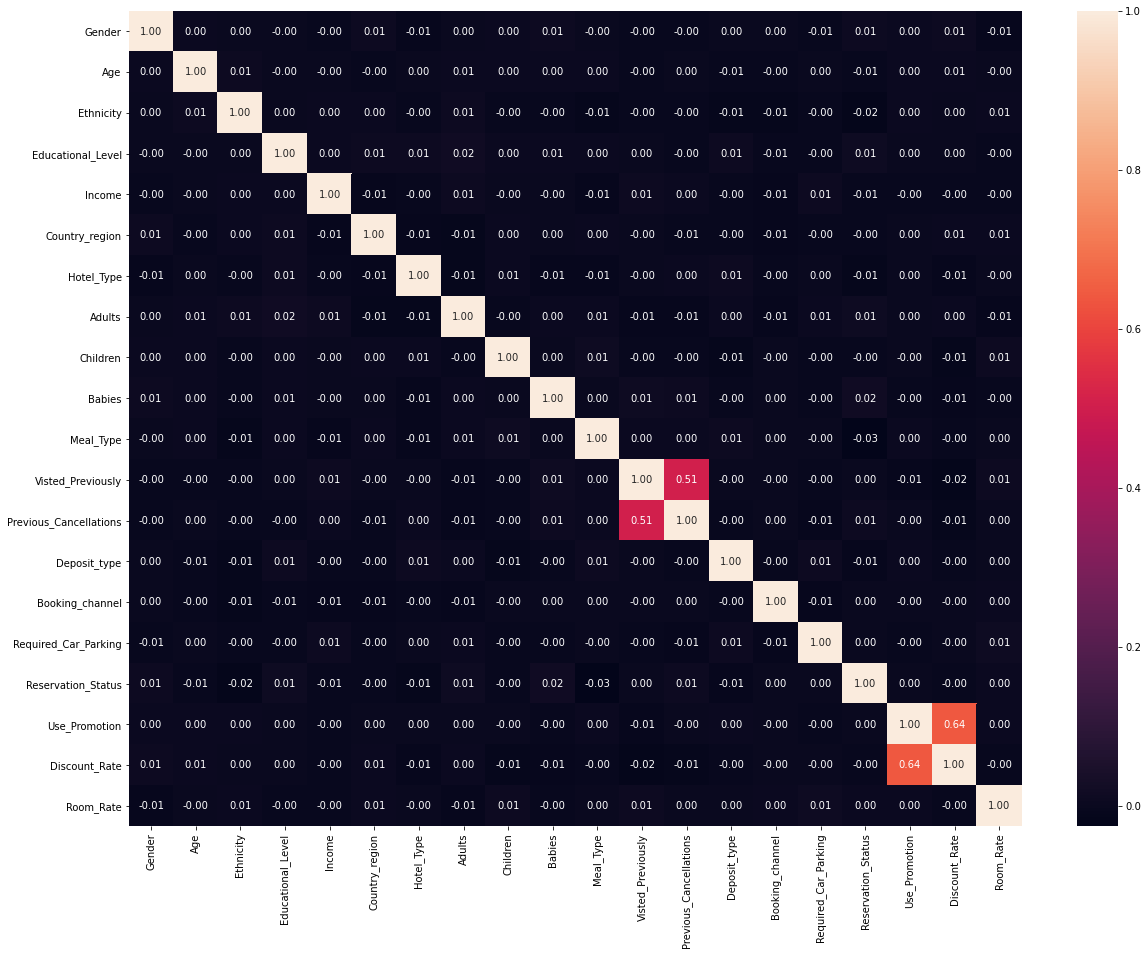

In [165]:
for col in categoricals:
    df_le[col] = le.fit_transform(df_le[col])

plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f');

In [166]:
df_le.dtypes

Gender                             int64
Age                                int64
Ethnicity                          int64
Educational_Level                  int64
Income                             int64
Country_region                     int64
Hotel_Type                         int64
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date              datetime64[ns]
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                          int64
Visted_Previously                  int64
Previous_Cancellations             int64
Deposit_type                       int64
Booking_channel                    int64
Required_Car_Parking               int64
Reservation_Status                 int64
Use_Promotion                      int64
Discount_Rate                      int64
Room_Rate                          int64
dtype: object

In [167]:
df_le.corr()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
Gender,1.000000,0.002908,0.000325,-0.000450,-0.003351,0.006861,-0.008613,0.000557,0.003810,0.009121,-0.001547,-0.003861,-0.002152,0.000649,0.002028,-0.005176,0.007850,0.003402,0.006692,-0.007197
Age,0.002908,1.000000,0.007495,-0.001441,-0.000555,-0.004428,0.001697,0.005065,0.004385,0.003809,0.004839,-0.002933,0.001231,-0.005340,-0.002218,0.000855,-0.005264,0.004318,0.006335,-0.000178
Ethnicity,0.000325,0.007495,1.000000,0.000872,0.004996,0.003218,-0.002587,0.007204,-0.004690,-0.002281,-0.013536,-0.004522,-0.001679,-0.011782,-0.011380,-0.002925,-0.015537,0.003722,0.002324,0.005026
Educational_Level,-0.000450,-0.001441,0.000872,1.000000,0.004105,0.006930,0.009606,0.015129,0.003810,0.005406,0.002624,0.000567,-0.004748,0.007929,-0.005361,-0.003821,0.010437,0.001368,0.001617,-0.002632
Income,-0.003351,-0.000555,0.004996,0.004105,1.000000,-0.006210,-0.003941,0.008059,-0.000008,-0.000242,-0.008438,0.007625,0.003185,-0.003852,-0.007585,0.009733,-0.005225,-0.001689,-0.003589,-0.004428
Country_region,0.006861,-0.004428,0.003218,0.006930,-0.006210,1.000000,-0.009632,-0.010837,0.002890,0.000589,0.003806,-0.000980,-0.005670,-0.002257,-0.005984,-0.002817,-0.002936,0.002154,0.006337,0.005543
Hotel_Type,-0.008613,0.001697,-0.002587,0.009606,-0.003941,-0.009632,1.000000,-0.011976,0.005259,-0.007523,-0.006464,-0.000258,0.002684,0.008386,-0.003799,0.001062,-0.012368,0.000361,-0.006664,-0.001053
Adults,0.000557,0.005065,0.007204,0.015129,0.008059,-0.010837,-0.011976,1.000000,-0.003966,0.004384,0.005001,-0.008322,-0.006798,0.004821,-0.008568,0.005898,0.011614,0.000214,0.003839,-0.006613
Children,0.003810,0.004385,-0.004690,0.003810,-0.000008,0.002890,0.005259,-0.003966,1.000000,0.000518,0.011412,-0.002590,-0.003639,-0.011337,-0.001333,-0.002301,-0.003690,-0.000587,-0.010817,0.007783
Babies,0.009121,0.003809,-0.002281,0.005406,-0.000242,0.000589,-0.007523,0.004384,0.000518,1.000000,0.002218,0.012201,0.006439,-0.002978,0.000894,-0.004404,0.015236,-0.001957,-0.006798,-0.004881


# need to do Feature Engineering

In [168]:
new_categoricals = [col for col in categoricals if col in train.drop(['Reservation_Status'], axis=1).columns]
df_hot = pd.get_dummies(data=train, columns=new_categoricals)
#test_hot = pd.get_dummies(data=test, columns=new_categoricals)
X_hot = df_hot.drop(['Expected_checkin','Expected_checkout','Booking_date','Reservation_Status'],axis = 1)
X_le = df_le.drop('Reservation_Status', axis=1)
y = df['Reservation_Status'].astype("category")

In [169]:
X_hot.dtypes

Age                              int64
Adults                           int64
Children                         int64
Babies                           int64
Discount_Rate                    int64
Room_Rate                        int64
Gender_F                         uint8
Gender_M                         uint8
Ethnicity_African American       uint8
Ethnicity_Asian American         uint8
Ethnicity_Latino                 uint8
Ethnicity_caucasian              uint8
Educational_Level_College        uint8
Educational_Level_Grad           uint8
Educational_Level_High-School    uint8
Educational_Level_Mid-School     uint8
Income_25K --50K                 uint8
Income_50K -- 100K               uint8
Income_<25K                      uint8
Income_>100K                     uint8
Country_region_East              uint8
Country_region_North             uint8
Country_region_South             uint8
Country_region_West              uint8
Hotel_Type_Airport Hotels        uint8
Hotel_Type_City Hotel    

In [170]:
y = train['Reservation_Status']
y = y.replace({
    'Check-In':1,
    'No-Show':3,
    'Canceled':2
})

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hot, y, test_size=.2, random_state=42)

In [172]:
y_test

24194    1
13755    1
4413     1
8897     1
15757    3
        ..
23962    1
15244    3
21553    2
5421     1
12703    1
Name: Reservation_Status, Length: 5500, dtype: int64

In [173]:
X_test

,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,...,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
24194,59,3,1,0,10,239,0,1,1,0,...,1,0,0,1,0,0,0,1,0,1
13755,28,2,3,0,25,133,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
4413,42,3,2,1,0,162,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
8897,63,3,3,2,0,195,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
15757,25,3,1,0,25,100,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23962,37,2,1,1,5,201,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
15244,52,1,1,0,20,151,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
21553,33,2,2,0,10,129,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
5421,70,2,1,0,10,171,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1


In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7758181818181819
              precision    recall  f1-score   support

           1       0.78      1.00      0.87      4267
           2       0.00      0.00      0.00       810
           3       0.00      0.00      0.00       423

    accuracy                           0.78      5500
   macro avg       0.26      0.33      0.29      5500
weighted avg       0.60      0.78      0.68      5500



/home/manodya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/manodya/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6007272727272728
              precision    recall  f1-score   support

           1       0.78      0.73      0.75      4267
           2       0.15      0.17      0.16       810
           3       0.09      0.12      0.10       423

    accuracy                           0.60      5500
   macro avg       0.34      0.34      0.34      5500
weighted avg       0.63      0.60      0.62      5500



In [176]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [177]:
y_test.describe()

count    5500.000000
mean        1.301091
std         0.603589
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Reservation_Status, dtype: float64

In [178]:
clf.score(X_test,y_test)

0.6007272727272728

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rdc = RandomForestClassifier(n_estimators = 30)
rdc = rdc.fit(X_train,y_train)
y_pred = rdc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7725454545454545
              precision    recall  f1-score   support

           1       0.78      0.99      0.87      4267
           2       0.18      0.01      0.01       810
           3       0.00      0.00      0.00       423

    accuracy                           0.77      5500
   macro avg       0.32      0.33      0.30      5500
weighted avg       0.63      0.77      0.68      5500



In [182]:
from sklearn.svm import SVC

In [183]:
svc = SVC()
svc = svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7758181818181819
              precision    recall  f1-score   support

           1       0.78      1.00      0.87      4267
           2       0.00      0.00      0.00       810
           3       0.00      0.00      0.00       423

    accuracy                           0.78      5500
   macro avg       0.26      0.33      0.29      5500
weighted avg       0.60      0.78      0.68      5500



/home/manodya/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = )